In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split as tts
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import r2_score, accuracy_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from pyod.models.iforest import IForest
from scipy.stats import randint, uniform
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings('ignore')

In [2]:
dTrain = pd.read_csv('train.csv')
dTest = pd.read_csv('test.csv')

In [3]:
dTrain

,id,"Alkalinity, total",Calcium,Chloride,Fluoride,Magnesium,Nitrate as N,Sodium,Specific Conductivity,Sulfate,Total Dissolved Solids,Hardness
0,0,120.0,24.0,6.9,0.314,7.1,0.498,48.0,510.0,23.20,240.0,90.4
1,1,140.0,41.0,11.0,0.150,6.5,0.950,19.0,300.0,8.50,190.0,130.0
2,2,160.0,51.0,9.0,0.450,9.1,2.500,12.0,370.0,25.00,230.0,160.0
3,3,46.0,13.0,2.9,0.120,2.7,0.430,6.4,110.0,5.00,97.0,41.0
4,4,240.0,147.0,70.0,0.600,48.0,6.800,93.0,1410.0,418.00,950.0,586.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6395,6395,180.0,58.0,40.0,0.180,25.0,3.600,22.0,540.0,48.00,400.0,219.0
6396,6396,44.0,5.7,3.0,0.120,3.7,0.470,5.9,100.0,0.85,56.0,30.0
6397,6397,138.0,40.3,28.4,0.100,14.2,8.600,31.0,438.0,17.70,300.0,159.0
6398,6398,210.0,110.0,190.0,0.230,47.0,7.900,120.0,1400.0,140.00,800.0,470.0


In [4]:
dTest

,id,"Alkalinity, total",Calcium,Chloride,Fluoride,Magnesium,Nitrate as N,Sodium,Specific Conductivity,Sulfate,Total Dissolved Solids
0,6400,93.0,15.9,3.6,0.100,11.90,1.400,12.7,208.0,6.5,156.0
1,6401,180.0,34.0,200.0,1.900,8.20,1.300,300.0,1700.0,210.0,860.0
2,6402,95.0,44.0,35.0,0.081,3.30,1.100,28.0,390.0,22.0,240.0
3,6403,110.0,29.0,12.0,0.250,6.00,0.150,23.0,283.0,15.0,190.0
4,6404,179.0,59.0,51.7,0.160,45.00,4.100,64.0,976.0,170.0,430.0
...,...,...,...,...,...,...,...,...,...,...,...
1596,7996,88.0,30.0,11.0,0.170,3.20,1.217,24.0,289.0,22.0,140.0
1597,7997,64.0,21.0,18.0,0.050,0.68,4.700,31.0,327.0,28.0,160.0
1598,7998,210.0,32.0,53.0,0.150,24.00,0.120,68.0,570.0,25.0,670.0
1599,7999,230.0,82.0,14.0,0.100,9.00,2.000,19.0,580.0,24.0,310.0


In [5]:
dTest.shape

(1601, 11)

In [6]:
dTrain.shape

(6400, 12)

In [7]:
dTrain.isna().sum()

id                        0
Alkalinity, total         0
Calcium                   0
Chloride                  0
Fluoride                  0
Magnesium                 0
Nitrate as N              0
Sodium                    0
Specific Conductivity     0
Sulfate                   0
Total Dissolved Solids    0
Hardness                  0
dtype: int64

In [8]:
dTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6400 entries, 0 to 6399
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      6400 non-null   int64  
 1   Alkalinity, total       6400 non-null   float64
 2   Calcium                 6400 non-null   float64
 3   Chloride                6400 non-null   float64
 4   Fluoride                6400 non-null   float64
 5   Magnesium               6400 non-null   float64
 6   Nitrate as N            6400 non-null   float64
 7   Sodium                  6400 non-null   float64
 8   Specific Conductivity   6400 non-null   float64
 9   Sulfate                 6400 non-null   float64
 10  Total Dissolved Solids  6400 non-null   float64
 11  Hardness                6400 non-null   float64
dtypes: float64(11), int64(1)
memory usage: 600.1 KB


In [9]:
dTrain.shape

(6400, 12)

In [10]:
dTrain.describe()

,id,"Alkalinity, total",Calcium,Chloride,Fluoride,Magnesium,Nitrate as N,Sodium,Specific Conductivity,Sulfate,Total Dissolved Solids,Hardness
count,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000
mean,3199.500000,167.151047,69.350432,53.213620,0.333625,23.446335,3.382707,62.437731,637.631953,71.645934,409.570669,216.148203
std,1847.665193,83.157803,1052.136452,92.934505,0.452473,325.389503,4.878279,556.891904,597.297274,108.414049,302.958442,161.431526
min,0.000000,12.000000,0.610000,0.580000,0.049000,0.051000,0.002300,1.300000,40.000000,0.140000,19.580000,2.500000
25%,1599.750000,110.000000,25.000000,11.000000,0.140000,7.300000,0.850000,21.000000,340.000000,13.000000,220.000000,101.000000
50%,3199.500000,153.500000,45.000000,28.000000,0.210000,14.000000,2.000000,35.000000,520.000000,33.000000,320.000000,180.000000
75%,4799.250000,209.000000,72.000000,62.000000,0.382250,25.000000,4.300000,60.000000,800.000000,85.000000,500.000000,281.000000
max,6399.000000,1000.000000,83000.000000,2100.000000,9.000000,26000.000000,106.000000,32000.000000,31400.000000,2000.000000,4100.000000,1901.000000


<Axes: >

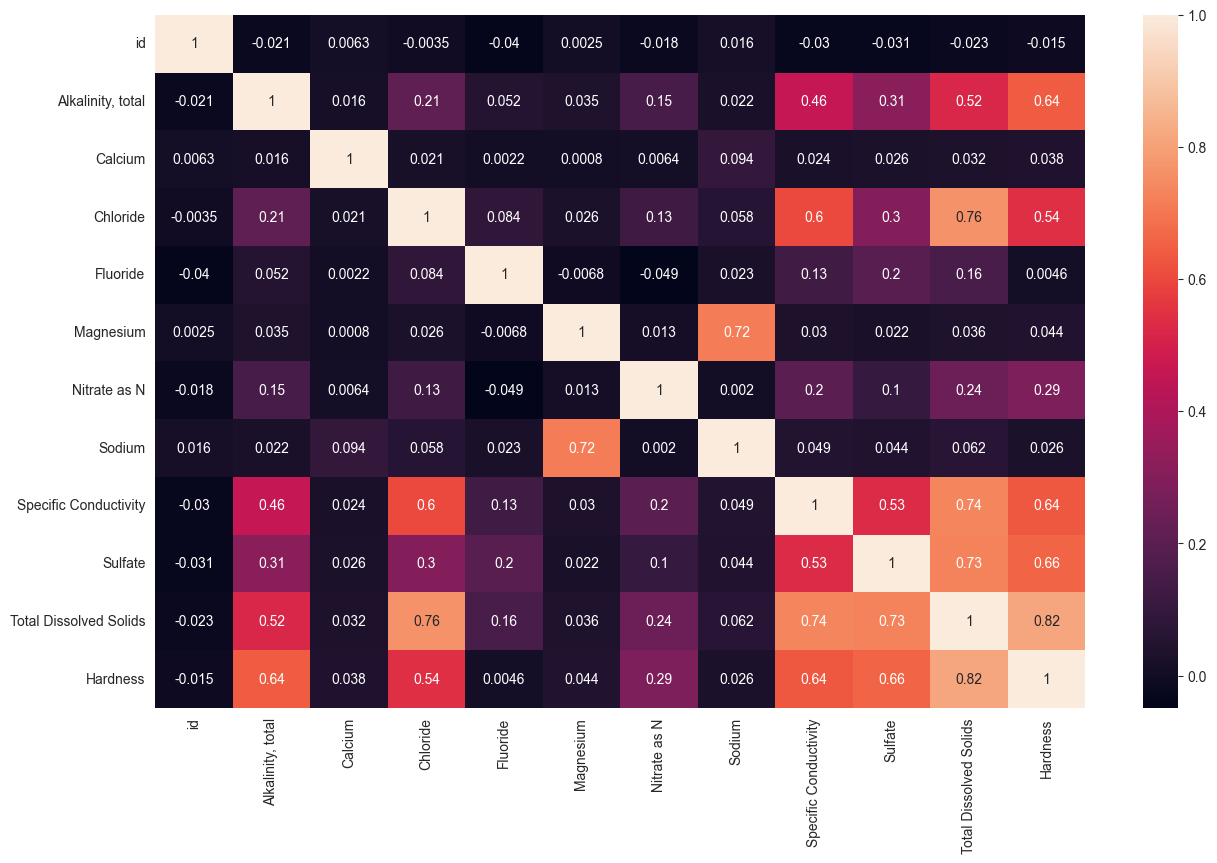

In [11]:
plt.figure(figsize=(15,9))
tcorr = dTrain.corr(method='pearson')
sns.heatmap(tcorr, annot=True) 

In [12]:
col = ['Alkalinity, total', 'Calcium', 'Chloride', 'Fluoride', 'Magnesium', 'Nitrate as N', 'Sodium', 'Specific Conductivity', 'Sulfate', 'Total Dissolved Solids', 'Hardness']

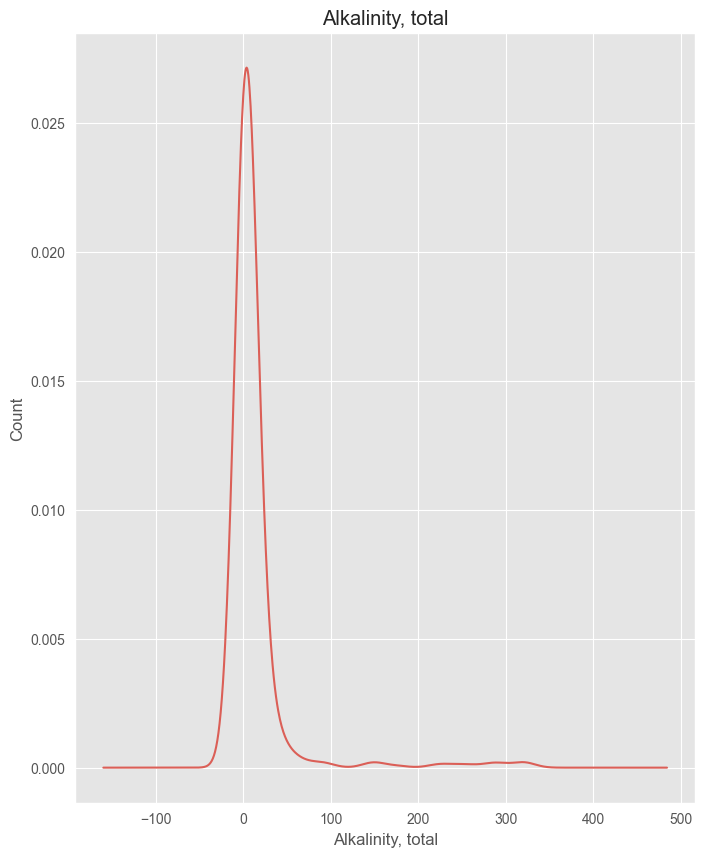

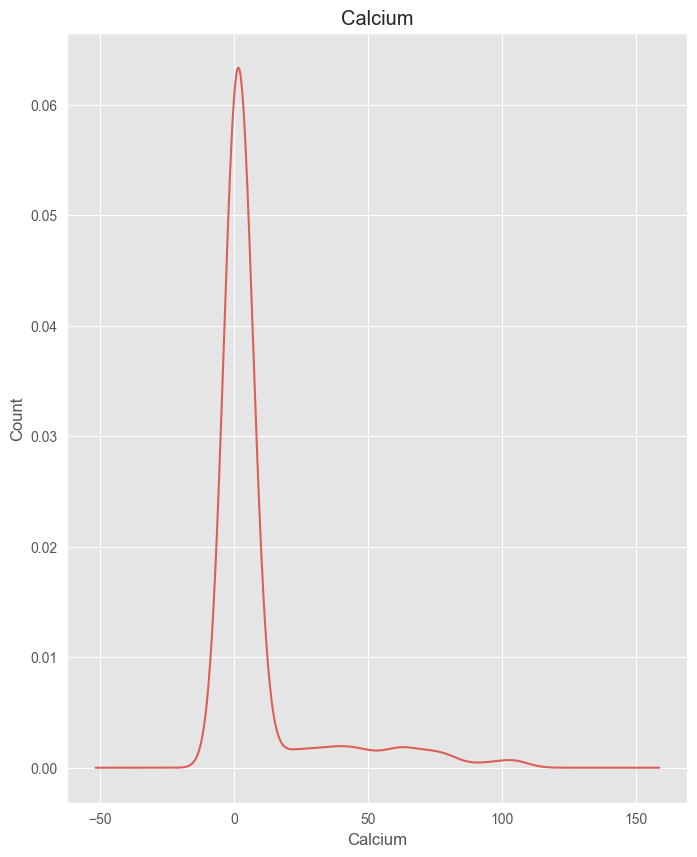

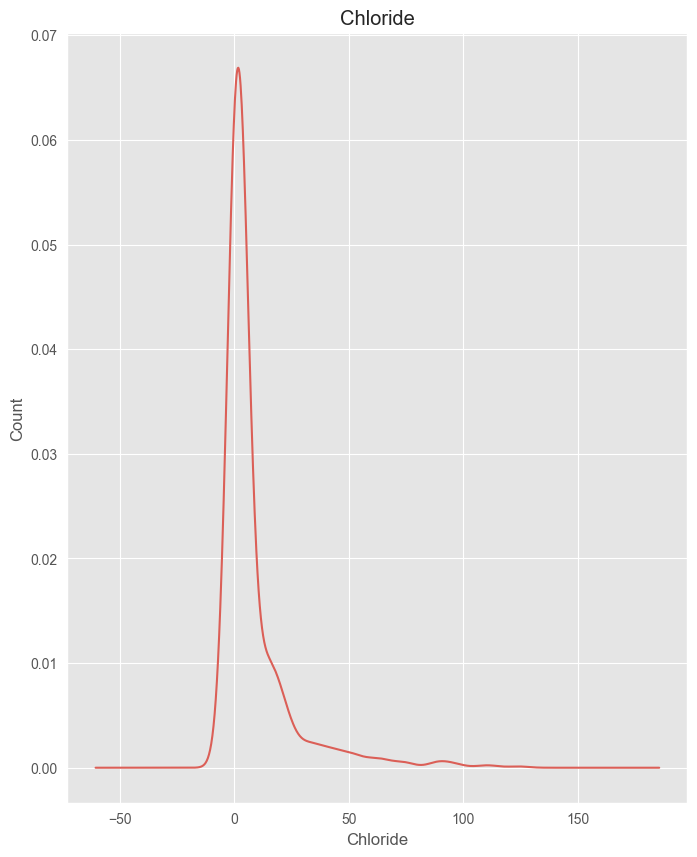

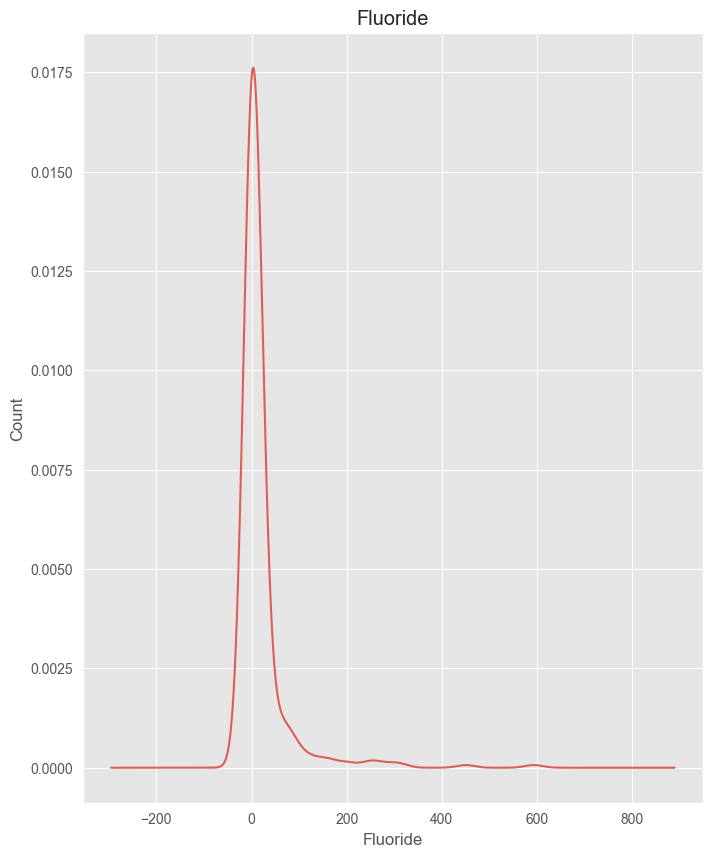

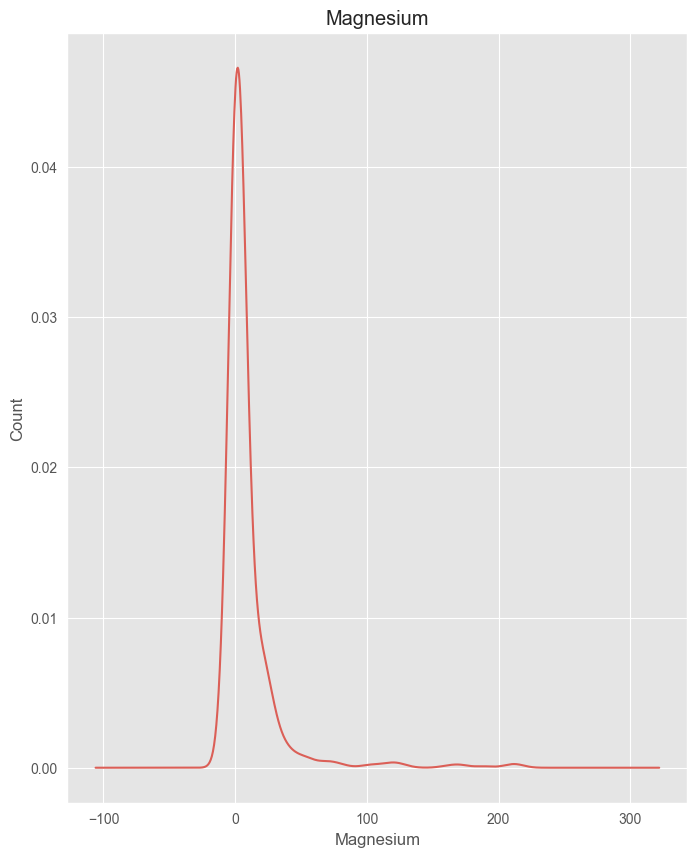

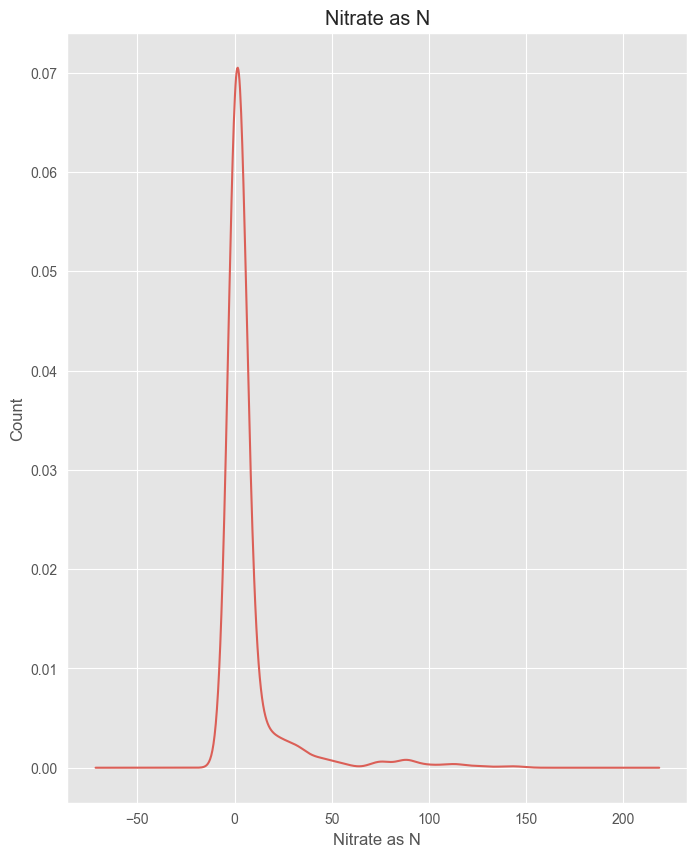

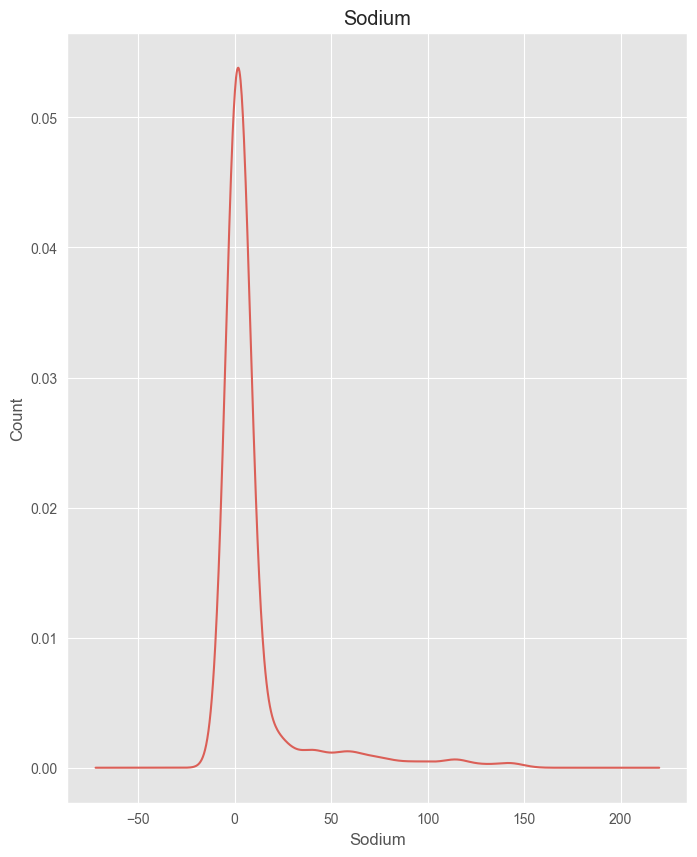

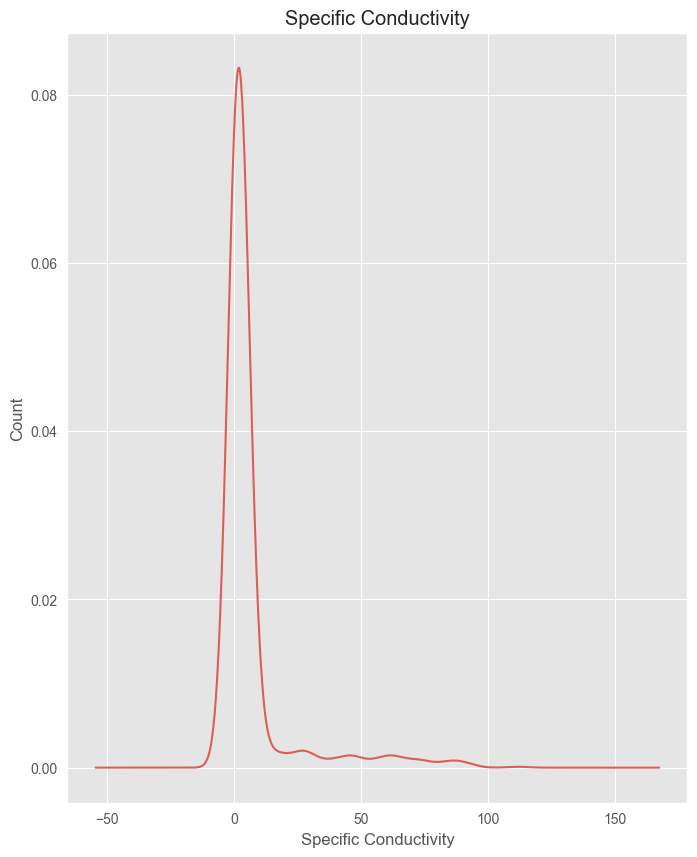

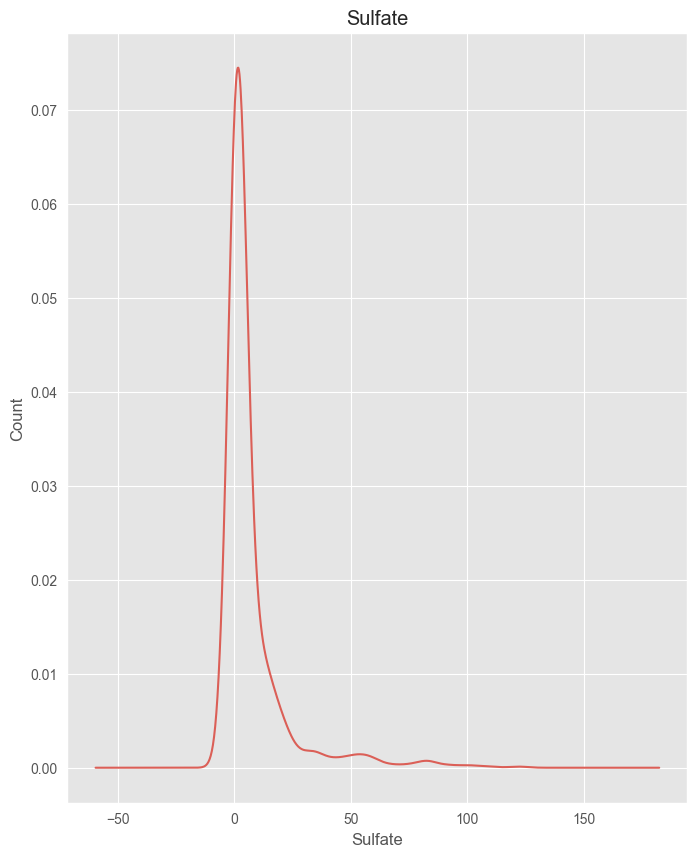

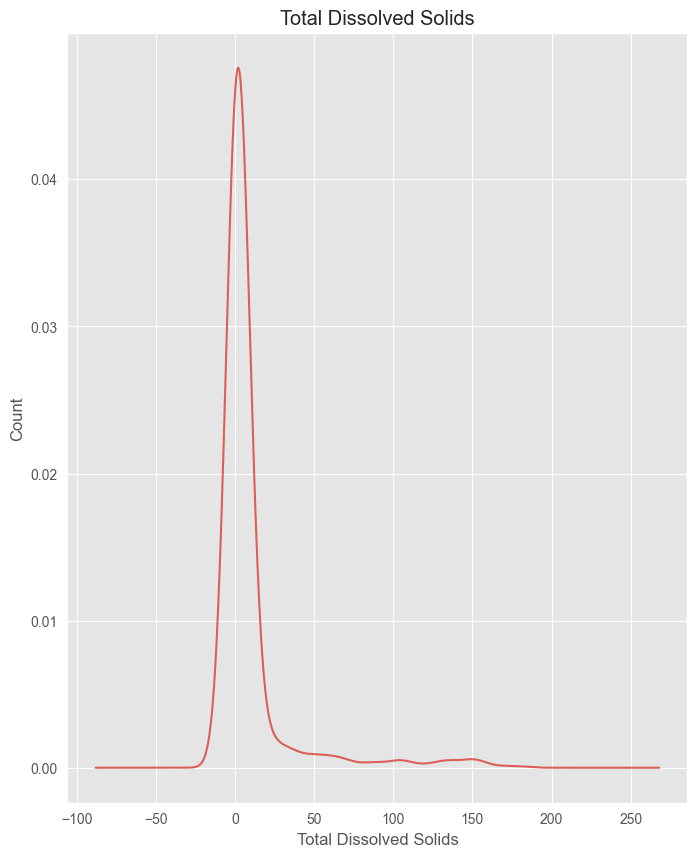

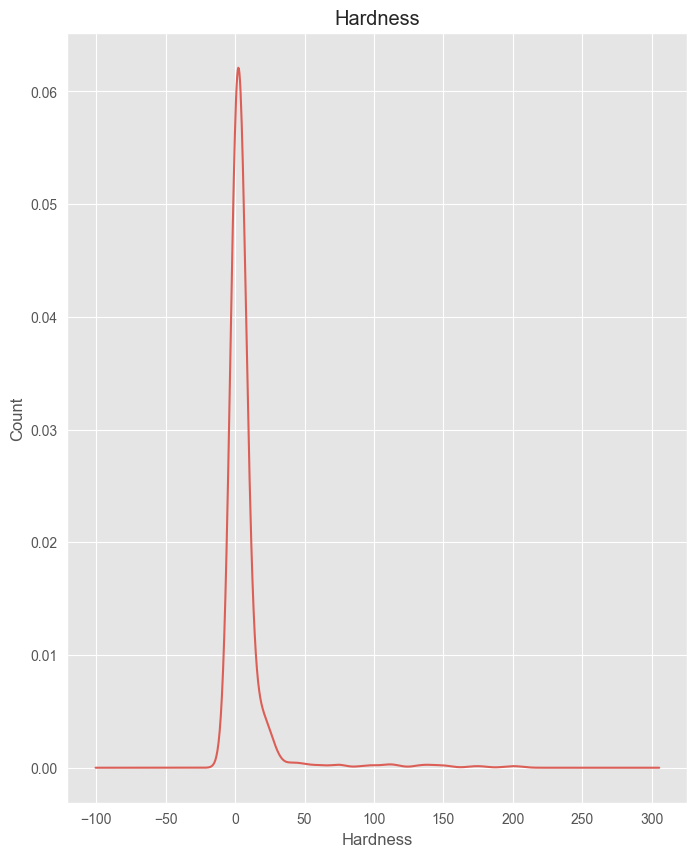

In [13]:
plt.style.use('ggplot')
bar_colors = sns.color_palette("hls", 8)

for kolom in col:
    plt.figure(figsize=(8, 10))
    counts = dTrain[kolom].value_counts()
    counts.plot(kind='kde', color=bar_colors)
    plt.xlabel(kolom)
    plt.ylabel("Count")
    plt.title(kolom)


In [14]:
fcol = ['Alkalinity, total', 'Calcium', 'Chloride', 'Fluoride', 'Magnesium', 'Nitrate as N', 'Sodium', 'Specific Conductivity', 'Sulfate', 'Total Dissolved Solids']
tcol = 'Hardness'

In [15]:
Ex = dTrain[fcol]
Ye = dTrain[tcol]

In [16]:
clf = IForest(contamination=0.1, random_state=42)
clf.fit(dTrain[fcol])
outliers = clf.labels_

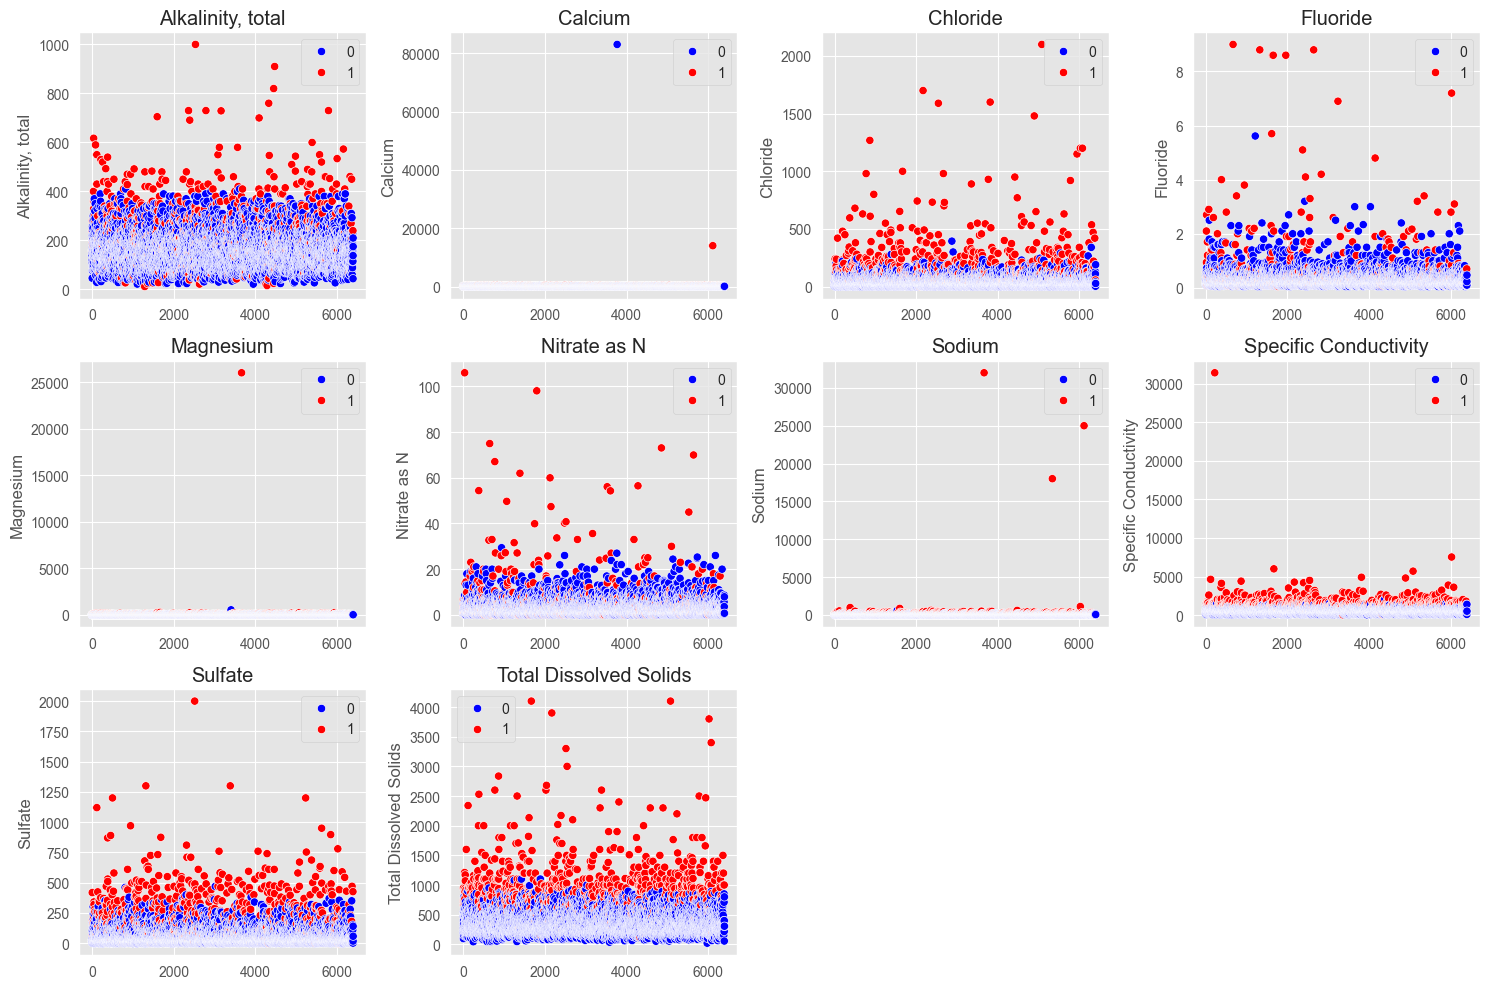

In [17]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(fcol, 1):
    plt.subplot(3, 4, i)
    sns.scatterplot(x=np.arange(len(Ex[column])), y=Ex[column], hue=outliers, palette={0: 'blue', 1: 'red'})
    plt.title(column)
plt.tight_layout()
plt.show()

In [18]:
X = dTrain[fcol]
y = dTrain[tcol]

In [19]:
X_train, X_val, y_train, y_val = tts(X, y,test_size=0.3, random_state=0)

# DTR

### try stanscale and DTR

In [27]:
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_val_scaled = ss.transform(X_val)
test_data_scaled = ss.transform(dTest[fcol])

In [28]:
dt = DecisionTreeRegressor(random_state=42,ccp_alpha=2,max_depth=6, min_samples_leaf=6)
dt.fit(X_train_scaled, y_train)

DecisionTreeRegressor(ccp_alpha=2, max_depth=6, min_samples_leaf=6,
                      random_state=42)

In [29]:
#predict val set
y_val_pred_scaled = dt.predict(X_val_scaled)
val_dtr_r2 = r2_score(y_val, y_val_pred_scaled)
print("Akura val R2 score with dtr is: {:.7f}".format(val_dtr_r2))

Akura val R2 score with dtr is: 0.9033138


In [30]:
y_train_pred_scaled = dt.predict(X_train_scaled)
train_dtr_r2 = r2_score(y_train, y_train_pred_scaled)
print("Akura train R2 score with dtr is: {:.7f}".format(train_dtr_r2))
#still  overfit

Akura train R2 score with dtr is: 0.9040854


In [39]:
test_pred_scaled = dt.predict(test_data_scaled)

In [40]:
submit = pd.DataFrame({
    'id': dTest['id'],
    'Hardness': test_pred_scaled,
})

In [41]:
submit.to_csv('submit_dtr_scaled.csv', index=False)
print("submit csv kedua: submit_dtr_scaled")

submit csv kedua: submit_dtr_scaled


### try minmax + dtr

In [20]:
# MMS IS RIGHT HERE
mms = MinMaxScaler()
X_Train_mms = mms.fit_transform(X_train)
X_Val_mms = mms.transform(X_val)
test_data_mms = mms.transform(dTest[fcol])

In [40]:
#pred val set
dt.fit(X_Train_mms, y_train)
y_val_pred_minmax = dt.predict(X_Val_mms)
val_dtr_r2 = r2_score(y_val, y_val_pred_minmax)
print("Akura val R2 score with minmax is: ", val_dtr_r2)

Akura val R2 score with minmax is:  0.9032442114918868


In [41]:
y_train_pred_minmax = dt.predict(X_Train_mms)
train_dtr_r2 = r2_score(y_train, y_train_pred_minmax)
print("Akura train R2 score with minmax is: ", train_dtr_r2)

Akura train R2 score with minmax is:  0.9040854055178242


In [177]:
test_pred_mms_dtr = dt.predict(test_data_mms)

In [179]:
sub_dtr_mms = pd.DataFrame({
    'id': dTest['id'],
    'Hardness': test_pred_mms_dtr
})

In [180]:
sub_dtr_mms.to_csv('submission2_dtr_mms.csv', index=False)
print("submit csv kedua: submission2_dtr_mms")

submit csv kedua: submission2_dtr_mms


### try robust scaler dtr

In [43]:
rc = RobustScaler()
X_Train_rc = rc.fit_transform(X_train)
X_Val_rc = rc.transform(X_val)
test_data_rc = rc.transform(dTest[fcol])

# Beralih ke RFR dan boosting algo sjh abis tu maybe autoML

# RFR

In [25]:
rfr = RandomForestRegressor(random_state=42)

### Robust scaler

In [115]:
rfr.fit(X_Train_rc, y_train)
y_val_pred_rc = rfr.predict(X_Val_rc)
val_rfr_r2_rc = r2_score(y_val, y_val_pred_rc)
print("Akura val R2 score rob scal with random forest is: ", val_rfr_r2_rc)

Akura val R2 score rob scal with random forest is:  0.9227809111566762


In [116]:
y_train_pred_rc = rfr.predict(X_Train_rc)
train_rfr_r2_rc = r2_score(y_train, y_train_pred_rc)
print("Akura train R2 score rob scal with random forest is: ", train_rfr_r2_rc)

Akura train R2 score rob scal with random forest is:  0.9505874117164225


### Min max scaler

In [23]:
rfr.fit(X_Train_mms, y_train)
rf_y_val_pred_mms = rfr.predict(X_Val_mms)
val_rfr_r2_mms = r2_score(y_val, rf_y_val_pred_mms)
print("Accuracy rfr mms on val is: ", val_rfr_r2_mms)

Accuracy rfr mms on val is:  0.9257899088323448


In [24]:
y_train_pred_mms_rfr = rfr.predict(X_Train_mms)
train_rfr_r2_mms = r2_score(y_train, y_train_pred_mms_rfr)
print("Accuracy dtr mms on train is: ", train_rfr_r2_mms)

Accuracy dtr mms on train is:  0.9376722918953997


In [136]:
test_pred_mms_rfr_mms = rfr.predict(test_data_mms)

In [137]:
submit_rfr_mms = pd.DataFrame({
    'id': dTest['id'],
    'Hardness': test_pred_mms_rfr_mms,
})

In [138]:
submit_rfr_mms.to_csv('sub_rfr_mms_par.csv', index=False)
print("submit csv lagi: sub_rfr_mms_par")

submit csv lagi: sub_rfr_mms_par


try to hypertune it

In [26]:
param_grid = {
    'n_estimators': [100, 150 ,200, 300, 400, 500],
    'max_depth': [None,5 ,6 ,7 ,10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [27]:
gscv = GridSearchCV(estimator=rfr, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)
gscv.fit(X_Train_mms, y_train)
best_rfr_mms = gscv.best_estimator_

In [28]:
rfr_y_val_pred_mms = best_rfr_mms.predict(X_Val_mms)
val_rfr_r2_mms = r2_score(y_val, rfr_y_val_pred_mms)
print("Accuracy best rfr grid search on val is: ", val_rfr_r2_mms)

Accuracy best rfr grid search on val is:  0.9207256117893644


In [29]:
y_train_pred_mms_rfr = best_rfr_mms.predict(X_Train_mms)
train_rfr_r2_mms = r2_score(y_train, y_train_pred_mms_rfr)
print("Accuracy best rfr grid search on train is: ", train_rfr_r2_mms)

Accuracy best rfr grid search on train is:  0.9762994438394096


In [30]:
test_pred_mms_rfr = best_rfr_mms.predict(test_data_mms)

In [37]:
submi = pd.DataFrame({
    'id': dTest['id'],
    'Hardness': test_pred_mms_rfr,
})

In [38]:
submi.to_csv('submit_rfr_mms_hypertune_gscv.csv', index=False)
print("Submit csv lagi random forest gscv: submit_rfr_mms_hypertune_gscv")

Submit csv lagi random forest gscv: submit_rfr_mms_hypertune_gscv


try randomized search

In [41]:
param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['auto', 'sqrt', 'log2']
}

In [45]:
random_search = RandomizedSearchCV(estimator=rfr, param_distributions=param_dist, cv=5, scoring='r2', n_jobs=-1, random_state=42, n_iter=100)
random_search.fit(X_Train_mms, y_train)
best_rfr_mms_rscv = random_search.best_estimator_

In [46]:
rfr_y_val_pred_mms_rscv = best_rfr_mms_rscv.predict(X_Val_mms)
val_rfr_r2_mms_rscv = r2_score(y_val, rfr_y_val_pred_mms_rscv)
print("Best rfr model after rscv on val is: ", val_rfr_r2_mms_rscv)

Best rfr model after rscv on val is:  0.9209968659239394


In [47]:
rfr_y_train_pred_mms_rscv = best_rfr_mms_rscv.predict(X_Train_mms)
train_rfr_r2_mms_rscv = r2_score(y_train, rfr_y_train_pred_mms_rscv)
print("Best rfr model after rscv on train is: ", train_rfr_r2_mms_rscv)

Best rfr model after rscv on train is:  0.9635735371994212


In [48]:
test_pred_mms_rscv = best_rfr_mms_rscv.predict(test_data_mms)

In [49]:
submitt = pd.DataFrame({
    'id': dTest['id'],
    'Hardness': test_pred_mms_rscv,
})

In [50]:
submitt.to_csv('submit_rfr_rscv_mms_hypertune.csv', index=False)
print("Submit csv lagi random forest rscv: submit_rfr_rscv_mms_hypertune")

Submit csv lagi random forest rscv: submit_rfr_rscv_mms_hypertune


# Linear reg

In [16]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_val_pred = lr.predict(X_val)

In [17]:
val_r2 = r2_score(y_val, y_val_pred)

In [18]:
print("Akurasi tes kedua yg val: ", val_r2)

Akurasi tes kedua yg val:  0.7561635077582115


In [19]:
# tes yang train cek overfit
y_train_pred = lr.predict(X_train)
train_r2 = r2_score(y_train, y_train_pred)
print("Akurasi tes kedua yg train: ", train_r2)

Akurasi tes kedua yg train:  0.7779828645767042


In [21]:
# load test.csv for linreg
X_test = dTest
test_pred = lr.predict(X_test)

In [22]:
submission2 = pd.DataFrame({
    'id' : dTest['id'],
    'Hardness' : test_pred
}
)

In [23]:
submission2.to_csv('submission2.csv', index=False)
print("submit csv kedua: submission2")

submit csv kedua: submission2


In [ ]:
train_r2 = r2_score(y_train, lr.predict(X_train))
print(f'Training R² score: {train_r2}')
if train_r2 > val_r2:
    print("The model may be overfitting. The training score is higher than the validation score.")
else:
    print("The model does not appear to be overfitting.")

## LASSO

In [24]:
#try with lasso reg
las = Lasso()
las.fit(X_train, y_train)
y_val_pred_las = las.predict(X_val)
val_las_r2 = r2_score(y_val, y_val_pred_las)

In [25]:
print("Akurasi tes kedua yg val lasso: ", val_las_r2)

Akurasi tes kedua yg val lasso:  0.7541047594638314


In [26]:
# tes yang train cek overfit lasso
y_train_pred_las = las.predict(X_train)
train_r2_las = r2_score(y_train, y_train_pred_las)
print("Akurasi tes kedua yg train: ", train_r2_las)

Akurasi tes kedua yg train:  0.7777555325791534


In [27]:
# load test.csv for lasreg
test_pred_las = las.predict(X_test)

In [28]:
submission2las = pd.DataFrame({
    'id' : dTest['id'],
    'Hardness' : test_pred_las
}
)

In [115]:
submission2las.to_csv('submission2lasso.csv', index=False)
print("submit csv kedua: submission2lasso")

submit csv kedua: submission2lasso


## RIDGE

In [29]:
# try with ridge reg
rid = Ridge()
rid.fit(X_train, y_train)
y_val_pred_rid = rid.predict(X_val)
val_rid_r2 = r2_score(y_val, y_val_pred_rid)

In [30]:
print("Akurasi tes kedua yg val ridge: ", val_rid_r2)

Akurasi tes kedua yg val ridge:  0.7561533377427485


In [31]:
# check the train ia it overfit with ridge?
y_train_pred_rid = rid.predict(X_train)
train_r2_rid = r2_score(y_train, y_train_pred_rid)
print("Akurasi tes kedua yg train ridge: ", train_r2_rid)

Akurasi tes kedua yg train ridge:  0.7779828487780354


In [32]:
# load test.csv for lridge
test_pred_rid = rid.predict(X_test)

In [33]:
submission2rid = pd.DataFrame({
    'id' : dTest['id'],
    'Hardness' : test_pred_rid
}
)

In [123]:
submission2rid.to_csv('submission2ridge.csv', index=False)
print("submit csv kedua: submission2ridge")

submit csv kedua: submission2ridge


# XGBOOST

In [73]:
xgb = XGBRegressor(random_state=42, n_estimators=100, learning_rate=0.1, max_depth=3, booster='gbtree')

In [74]:
xgb.fit(X_Train_mms, y_train)

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
# mms = MinMaxScaler()
# X_Train_mms = mms.fit_transform(X_train)
# X_Val_mms = mms.transform(X_val)
# test_data_mms = mms.transform(dTest[fcol])

In [75]:
xgb_y_val_pred_mms = xgb.predict(X_Val_mms)
val_xgb_r2_mms = r2_score(y_val, xgb_y_val_pred_mms)
print("xgb model mms without hytune on val r2: ", val_xgb_r2_mms)

xgb model mms without hytune on val r2:  0.9264423177077564


In [76]:
y_train_xgb_mms = xgb.predict(X_Train_mms)
train_xgb_r2_mms = r2_score(y_train, y_train_xgb_mms)
print("xgb model mms without hytune on train r2: ", train_xgb_r2_mms)

xgb model mms without hytune on train r2:  0.9357956369144333


#### hytune xgboost

In [21]:
param_dist = {
    'n_estimators': randint(100, 500),
    'learning_rate': uniform(0.01, 0.2),
    'max_depth': randint(3, 10),
    'min_child_weight': randint(1, 6),
    'subsample': uniform(0.7, 0.3),
    'colsample_bytree': uniform(0.7, 0.3)
}

In [22]:
boostxgb = XGBRegressor(random_state=42)

In [23]:
rands = RandomizedSearchCV(estimator=boostxgb, param_distributions=param_dist, n_iter=100, cv=5, scoring='r2', random_state=42, n_jobs=-1)
rands.fit(X_Train_mms, y_train)
best_xgb_model = rands.best_estimator_

In [24]:
rscv_xgb_y_val_pred_mms = best_xgb_model.predict(X_Val_mms)
val_rscv_xgb_r2_mms = r2_score(y_val, rscv_xgb_y_val_pred_mms)
print("Best xgb model after hytune mms on val r2: ", val_rscv_xgb_r2_mms)

Best xgb model after hytune mms on val r2:  0.9306982559099712


In [25]:
rscv_xgb_y_train_pred_mms = best_xgb_model.predict(X_Train_mms)
train_xgb_r2_mms_rscv = r2_score(y_train, rscv_xgb_y_train_pred_mms)
print("Best xgb model after hytune mms on train r2: ", train_xgb_r2_mms_rscv)

Best xgb model after hytune mms on train r2:  0.9240971618076722


In [83]:
test_pred_using_xgb_hytune = best_xgb_model.predict(test_data_mms)

In [84]:
submission = pd.DataFrame({
    'id' : dTest['id'],
    'Hardness' : test_pred_using_xgb_hytune
})

In [85]:
submission.to_csv('sub_xgb_hytune.csv', index=False)
print("Submit xgb tuned ; sub_xgb_hytune.csv")

Submit xgb tuned ; sub_xgb_hytune.csv


# GBR WITH HYTUNE MMS

In [27]:
par_dist = {
    'n_estimators': randint(100, 500),
    'learning_rate': uniform(0.01, 0.2),
    'max_depth': randint(3, 10),
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5),
    'subsample': uniform(0.7, 1.0),
    'max_features': ['auto', 'sqrt', 'log2']
}

In [26]:
gbur = GradientBoostingRegressor(random_state=42)

In [28]:
rs = RandomizedSearchCV(estimator=gbur, param_distributions=par_dist, n_iter=100, cv=5, scoring='r2', random_state=42, n_jobs=-1)
rs.fit(X_Train_mms, y_train)
best_gbur = rs.best_estimator_

In [29]:
gbr_y_val_pred_mms = best_gbur.predict(X_Val_mms)
val_gbr_r2_mms = r2_score(y_val, gbr_y_val_pred_mms)
print("Accuracy using gbr mms hytuned on val r2: ", val_gbr_r2_mms)

Accuracy using gbr mms hytuned on val r2:  0.9282207171167537


In [30]:
y_train_gbr_mms = best_gbur.predict(X_Train_mms)
train_gbr_r2_mms = r2_score(y_train, y_train_gbr_mms)
print("Accuracy using gbr mms hytuned on train r2: ", train_gbr_r2_mms)

Accuracy using gbr mms hytuned on train r2:  0.9270259511966539


try pure data/without prepro

In [32]:
rs.fit(X_train, y_train)
gbr_pure_terbaik = rs.best_estimator_

In [33]:
pure_gbr_y_val_pred = gbr_pure_terbaik.predict(X_val)
r2_pure_gbr_val = r2_score(y_val, pure_gbr_y_val_pred)
print("Accuracy gbr pure data on val r2: ", r2_pure_gbr_val)

Accuracy gbr pure data on val r2:  0.9276915768181216


In [34]:
pure_gbr_train_y = gbr_pure_terbaik.predict(X_train)
train_gbr_pure_r2 = r2_score(y_train, pure_gbr_train_y)
print("Accuracy gbr pure data on train r2: ", train_gbr_pure_r2)

Accuracy gbr pure data on train r2:  0.9269280574644732
